### 금융 시장의 수익률 (Finacial Market Return)
- 일반적으로 금융 시장을 분석하거나 머신러닝 모델을 구축할 때 price가 아닌 return을 활용하는 경우가 많다.
- 수익률을 통해 복리계산과 연율화(1년 간의 성장률)등을 위해 무수히 많은 반복 계산을 하게 되므로  
  (1 + return)으로 계산할 경우 복잡하고 번거로워진다.
- 기존 return에 log를 취해주면, 더 편한 계산이 가능해지지만 당연히 약간의 오차는 발생하게 된다.
- 약간의 오차를 감수하고 로그를 사용함으로써 얻는 이득이 훨씬 많고, 국내 주식에서의 상한선과 하한선은 -30% ~ 30% 제약까지 있기 때문에 일반적인 주가 움직임에 대해 오차가 극히 적다.
- 즉, 로그를 취하는 것은 정밀성보다 편의성을 높인 것으로 이해하면 된다.
- 수익률 단위가 분, 초, 밀리초 이하로 내려가야 정밀성에 차이가 많이 발생하지만, 실제 금융시장에서는  
  최소 하루 단위 이상으로 계산하기 때문에 오차가 거의 발생하지 않게 된다.
- 또한, return에 로그를 취하면 우측으로 치우친 확률 분포를 중심으로 재조정해주는 효과까지 있기 때문에 안쓸 이유가 없다.

<img src="./images/log_return.png" width="700px">

In [31]:
import yfinance as yf

# VIX는 투자자들이 향후 30일간 S&P 500지수가 얼마나 변동할 것인지를 반영한 지수이다.
# 투자자들이 투자 결정을 내리기 전에 시장 리스크, 공포 및 스트레스를 측정하는 데 사용한다.
columns = ['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS', 
           'SPY', '^SPX', '^VIX', 'EURUSD=X', '^XAU', 'GDX', 'GLD']


f_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  12 of 12 completed


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6604,23.3894,86.8601,1132.9900,20.04,174.02
2010-01-05,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.5200,19.35,176.02
2010-01-06,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.76
2010-01-07,6.3584,6.5000,1.4318,43.4093,110.82,138.3344,13.4773,23.0115,87.5192,1141.6899,19.06,179.21
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,195.8700,181.2800,1.0882,34.7900,217.82,461.6800,30.7800,424.0100,534.6700,5354.0298,12.63,140.83
2024-06-06,194.4800,185.0000,1.0875,36.0100,219.43,458.1000,30.4200,424.5200,534.6600,5352.9600,12.58,145.38
2024-06-07,196.8900,184.3000,1.0894,33.5400,211.60,454.9100,30.7400,423.8500,534.0100,5346.9902,12.22,136.20


In [32]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3768 entries, 2010-01-01 to 2024-06-11
Freq: B
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AAPL      3633 non-null   float64
 1   AMZN      3633 non-null   float64
 2   EURUSD=X  3763 non-null   float64
 3   GDX       3633 non-null   float64
 4   GLD       3633 non-null   float64
 5   GS        3633 non-null   float64
 6   INTC      3633 non-null   float64
 7   MSFT      3633 non-null   float64
 8   SPY       3633 non-null   float64
 9   ^SPX      3633 non-null   float64
 10  ^VIX      3634 non-null   float64
 11  ^XAU      3633 non-null   float64
dtypes: float64(12)
memory usage: 382.7 KB


In [33]:
# 참고
# 인덱스를 원하는 컬럼으로 변경한 뒤, DatetimeIndex으로 변환
# pd.read_csv('path', index_col='날짜 컬럼명', parse_dates=True)

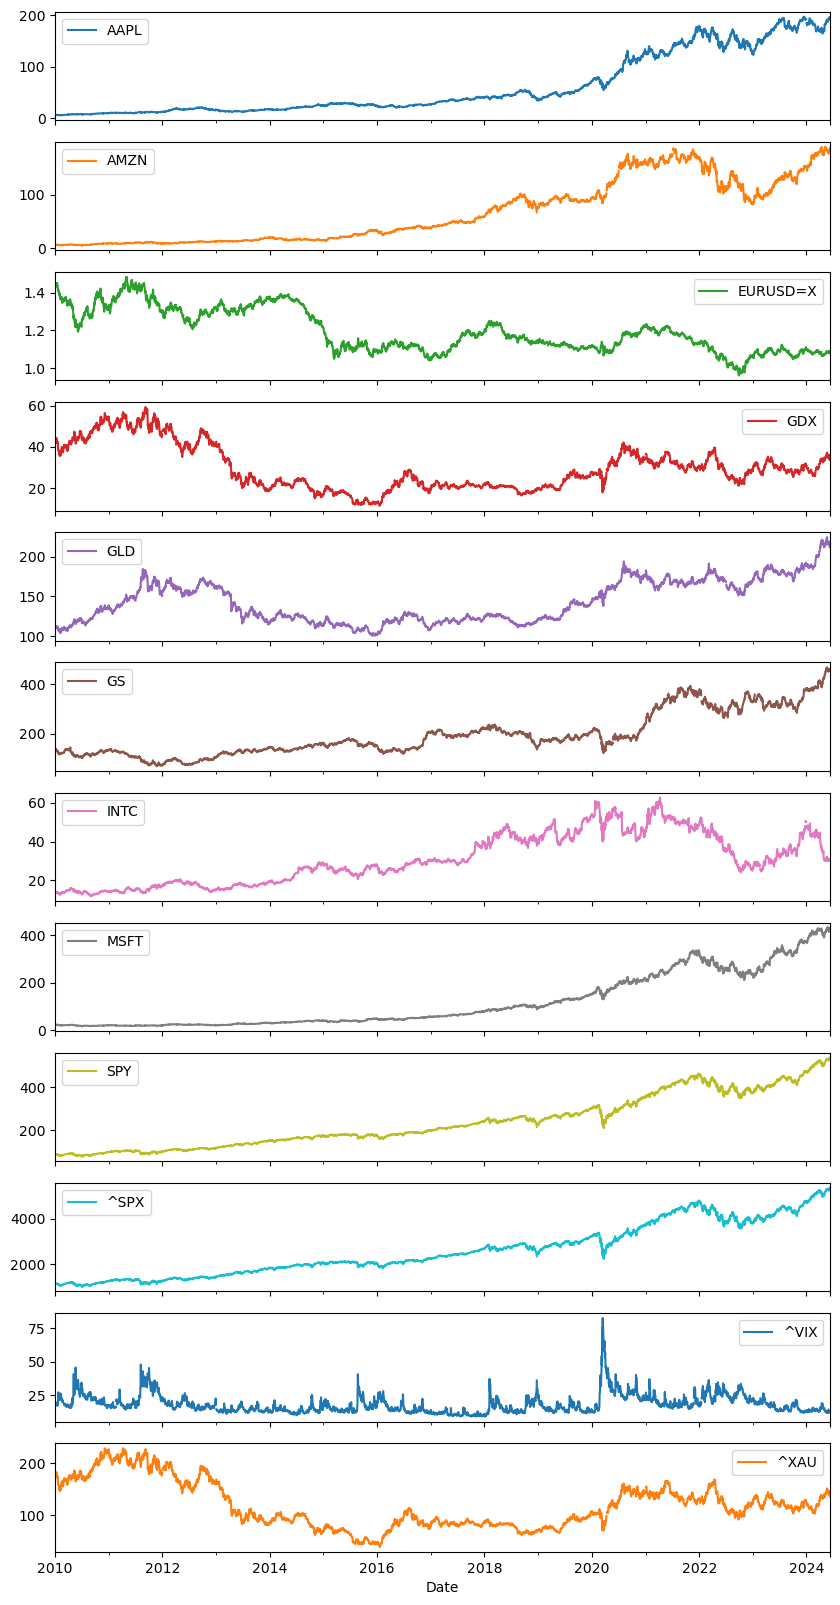

In [34]:
import matplotlib.pyplot as plt

f_df.plot(figsize=(10, 20), subplots=True)
plt.show()

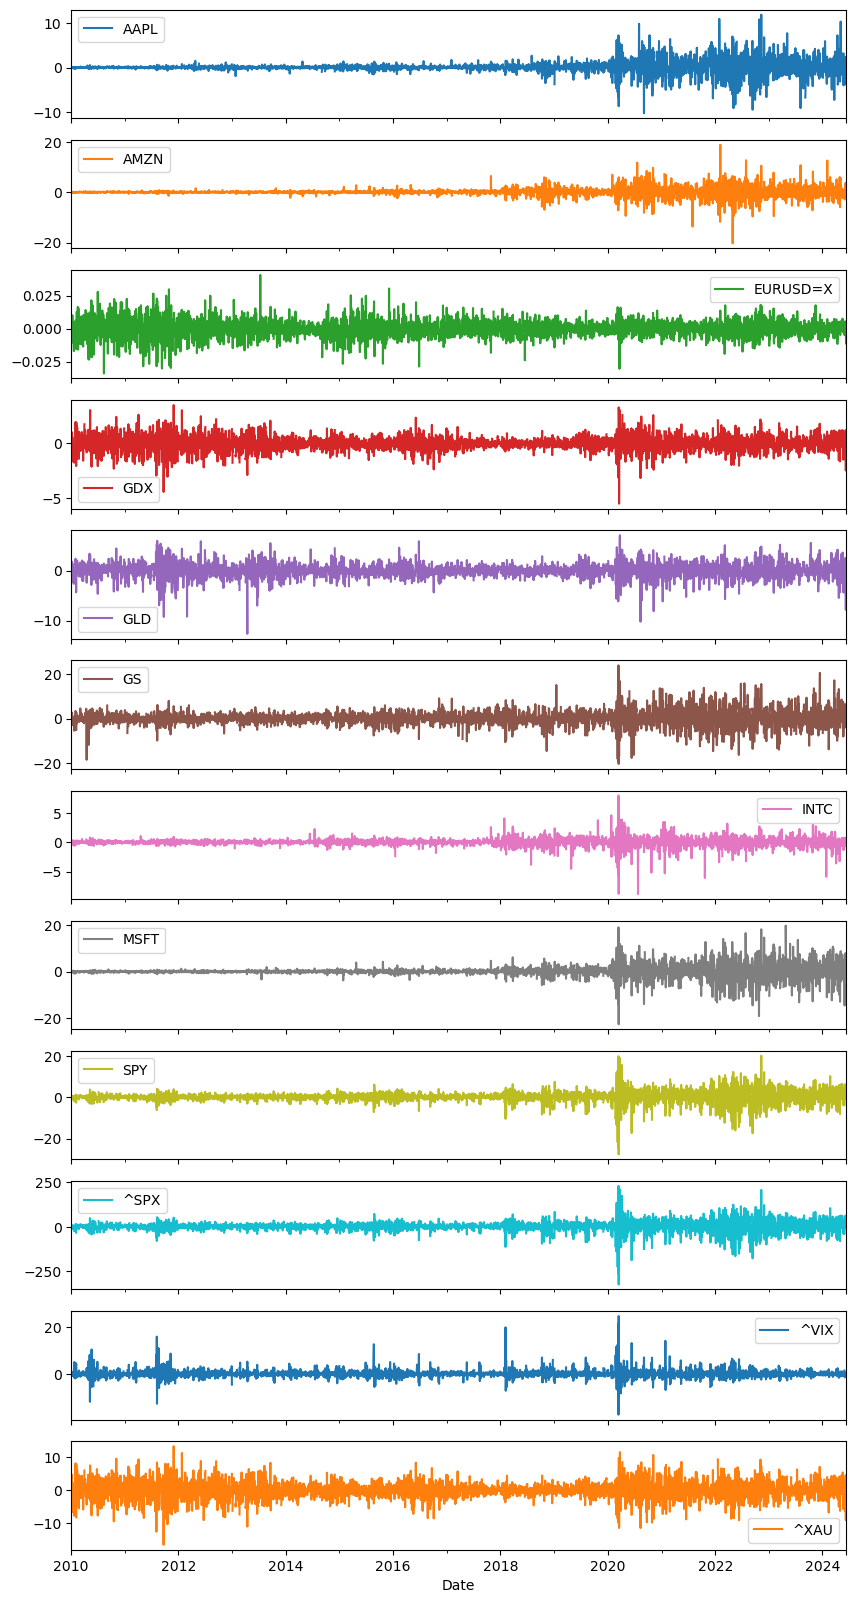

In [35]:
f_df.diff().plot(figsize=(10, 20), subplots=True)
plt.show()

C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_25140\3958772669.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))


<Axes: xlabel='Ticker'>

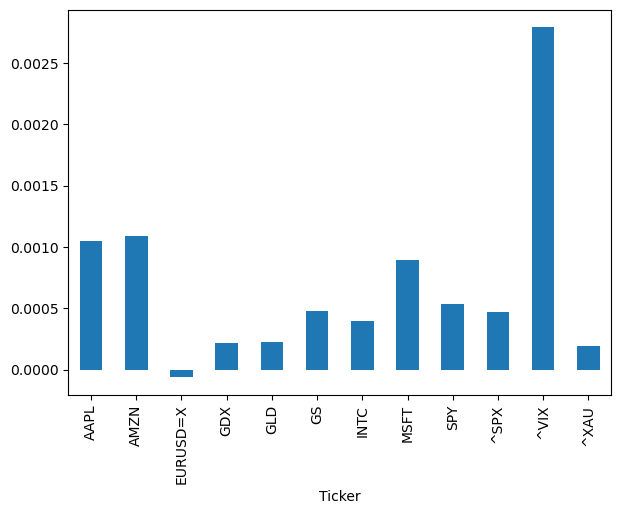

In [36]:
f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))

In [37]:
display(f_df.shift(1).head(4))
display(f_df.head(4))
display(f_df.shift(-1).head(4))

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.4620,6.6950,1.4424,42.1804,109.8,134.7607,13.6604,23.3894,86.8601,1132.99,20.04,174.02
2010-01-06,6.4731,6.7345,1.4366,42.5871,109.7,137.1432,13.6539,23.3970,87.0900,1136.52,19.35,176.02


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6604,23.3894,86.8601,1132.99,20.04,174.02
2010-01-05,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.52,19.35,176.02
2010-01-06,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.14,19.16,180.76


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6604,23.3894,86.8601,1132.9900,20.04,174.02
2010-01-04,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.5200,19.35,176.02
2010-01-05,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.76
2010-01-06,6.3584,6.5000,1.4318,43.4093,110.82,138.3344,13.4773,23.0115,87.5192,1141.6899,19.06,179.21


In [38]:
import numpy as np

rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,0.002360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001716,0.005883,-0.004029,0.009596,-0.000911,0.017525,-0.000476,0.000325,0.002643,0.003111,-0.035038,0.011427
2010-01-06,-0.016024,-0.018282,0.002642,0.023999,0.016365,-0.010731,-0.003360,-0.006156,0.000704,0.000545,-0.009868,0.026573
2010-01-07,-0.001854,-0.017160,-0.005988,-0.004876,-0.006207,0.019379,-0.009658,-0.010457,0.004213,0.003993,-0.005233,-0.008612
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,0.007791,0.010759,-0.002295,0.017689,0.011776,0.013915,0.024668,0.018904,0.011815,0.011778,-0.041107,0.015601
2024-06-06,-0.007122,0.020313,-0.000643,0.034467,0.007364,-0.007785,-0.011765,0.001202,-0.000019,-0.000200,-0.003967,0.031798
2024-06-07,0.012316,-0.003791,0.001746,-0.071058,-0.036336,-0.006988,0.010464,-0.001579,-0.001216,-0.001116,-0.029034,-0.065227


<Axes: xlabel='Date'>

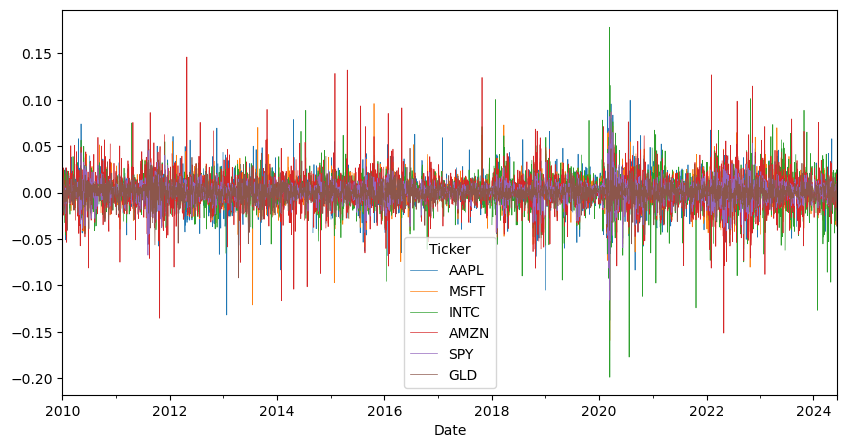

In [39]:
rate_f_df[['AAPL', 'MSFT', 'INTC', 'AMZN', 'SPY', 'GLD']].plot(figsize=(10, 5), lw=0.5)

In [40]:
# 연율화
# 연간 영업일(약 252일로 계산)
rate_f_df.mean() * 252

Ticker
AAPL        0.231636
AMZN        0.201635
EURUSD=X   -0.020378
GDX        -0.013077
GLD         0.038941
GS          0.096082
INTC        0.053507
MSFT        0.197103
SPY         0.128584
^SPX        0.110815
^VIX       -0.344683
^XAU       -0.013977
dtype: float64

In [41]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [42]:
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

,vif_score,feature
0,2.003978,AAPL
1,1.688432,AMZN
2,1.005267,EURUSD=X
3,23.014771,GDX
4,2.392762,GLD
5,2.326587,GS
6,1.759425,INTC
7,2.626578,MSFT
8,402.722358,SPY
9,401.679576,^SPX


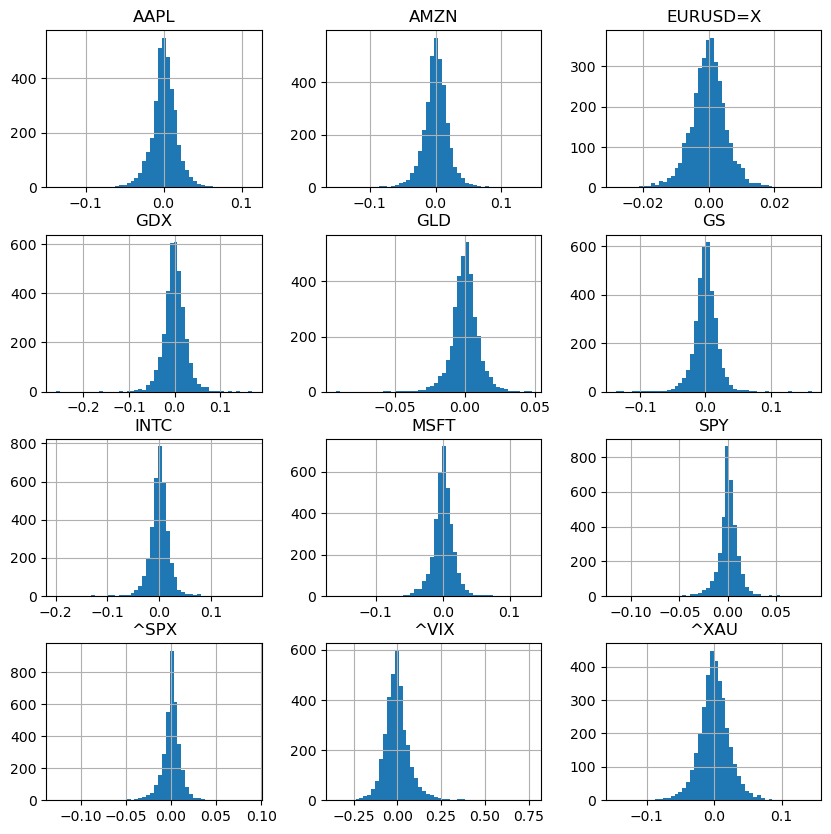

In [43]:
rate_f_df.hist(figsize=(10, 10), bins=50)
plt.show()

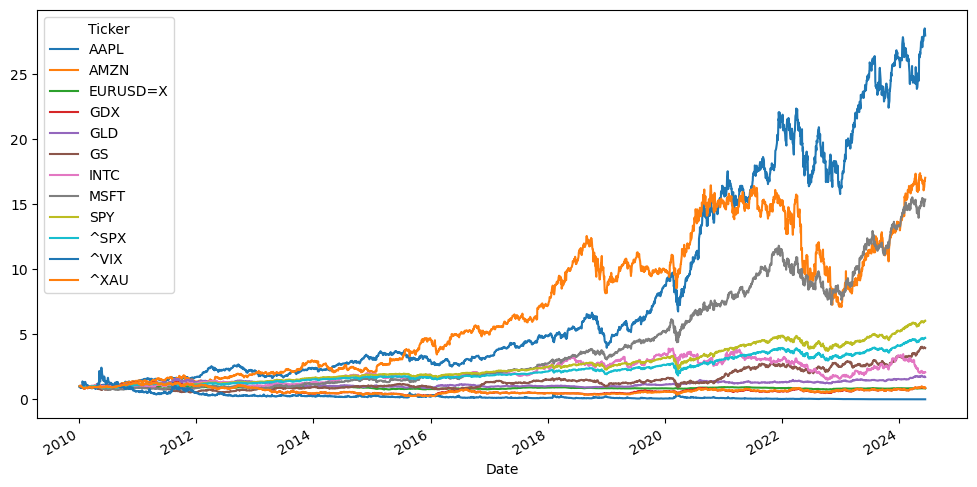

In [44]:
# 일간 수익률
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

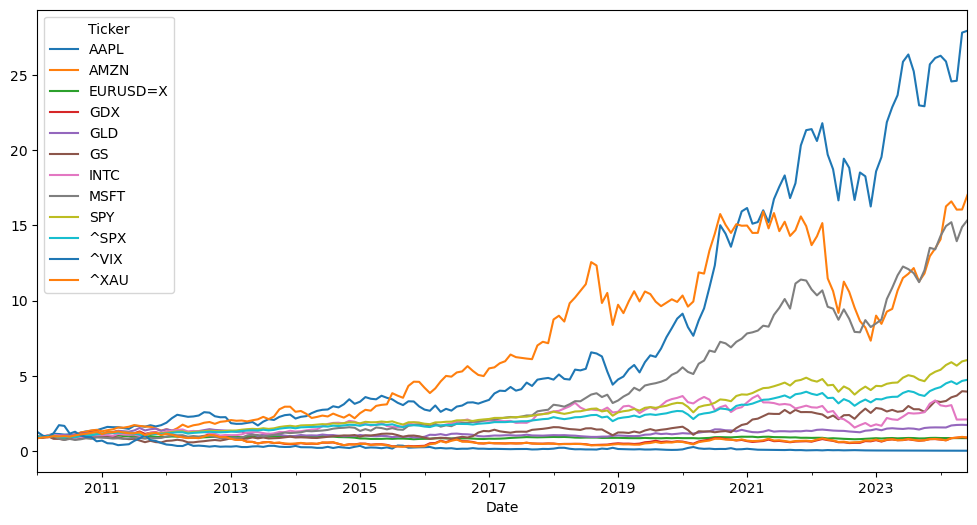

In [45]:
# 월간 수익률
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

In [52]:
amzn_df = f_df[['GS']].dropna()
amzn_df

Ticker,GS
Date,
2010-01-04,134.7607
2010-01-05,137.1432
2010-01-06,135.6794
2010-01-07,138.3344
2010-01-08,135.7183
...,...
2024-06-04,455.3000
2024-06-05,461.6800
2024-06-06,458.1000


In [53]:
window = 20

amzn_df['min'] = amzn_df['GS'].rolling(window=window).min()
amzn_df['mean'] = amzn_df['GS'].rolling(window=window).mean()
amzn_df['std'] = amzn_df['GS'].rolling(window=window).std()
amzn_df['median'] = amzn_df['GS'].rolling(window=window).median()
amzn_df['max'] = amzn_df['GS'].rolling(window=window).max()

amzn_df.dropna()

Ticker,GS,min,mean,std,median,max
Date,,,,,,
2010-02-01,119.2275,115.7939,127.682765,7.480332,130.27985,138.3344
2010-02-02,122.1940,115.7939,127.054430,7.381646,129.27545,138.3344
2010-02-03,122.4198,115.7939,126.318260,7.049236,126.94350,138.3344
2010-02-04,117.3200,115.7939,125.400290,6.960895,123.83685,138.3344
2010-02-05,120.0295,115.7939,124.485045,6.347100,122.30690,135.7183
...,...,...,...,...,...,...
2024-06-04,455.3000,441.1304,455.814870,6.429880,455.55315,467.5804
2024-06-05,461.6800,444.2615,456.842350,5.540167,456.11610,467.5804
2024-06-06,458.1000,450.2300,457.534275,4.684264,456.78205,467.5804


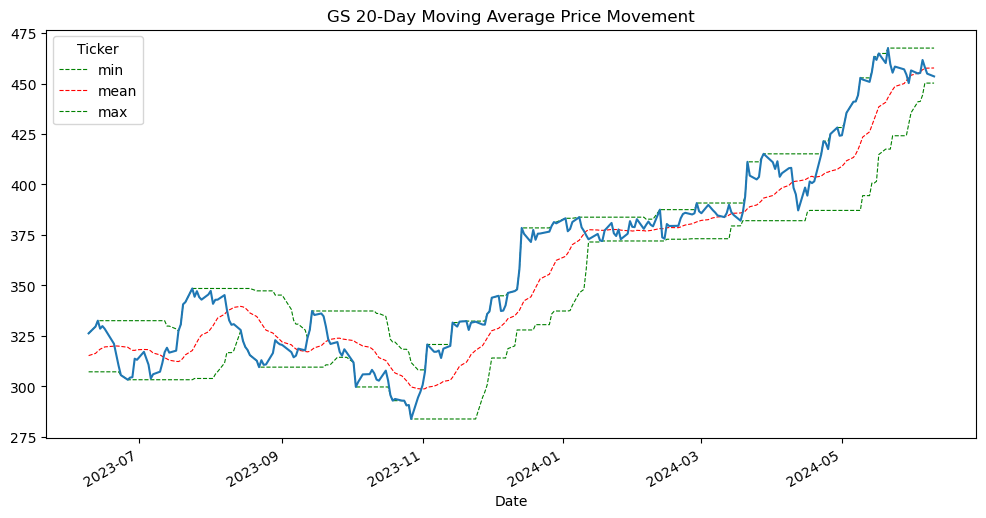

In [54]:
import matplotlib.pyplot as plt

ax = amzn_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
amzn_df['GS'].iloc[-252:].plot(ax=ax)
plt.title("GS 20-Day Moving Average Price Movement")
plt.show()

In [55]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

amzn_df['SMA1'] = amzn_df['GS'].rolling(window=21).mean() #short-term
amzn_df['SMA2'] = amzn_df['GS'].rolling(window=252).mean() #long-term
amzn_df[['GS', 'SMA1', 'SMA2']].tail()

Ticker,GS,SMA1,SMA2
Date,,,
2024-06-04,455.30,455.109457,358.920597
2024-06-05,461.68,456.094162,359.512854
2024-06-06,458.10,456.902238,360.071680
2024-06-07,454.91,457.409310,360.583366
2024-06-10,453.55,457.444086,361.090735


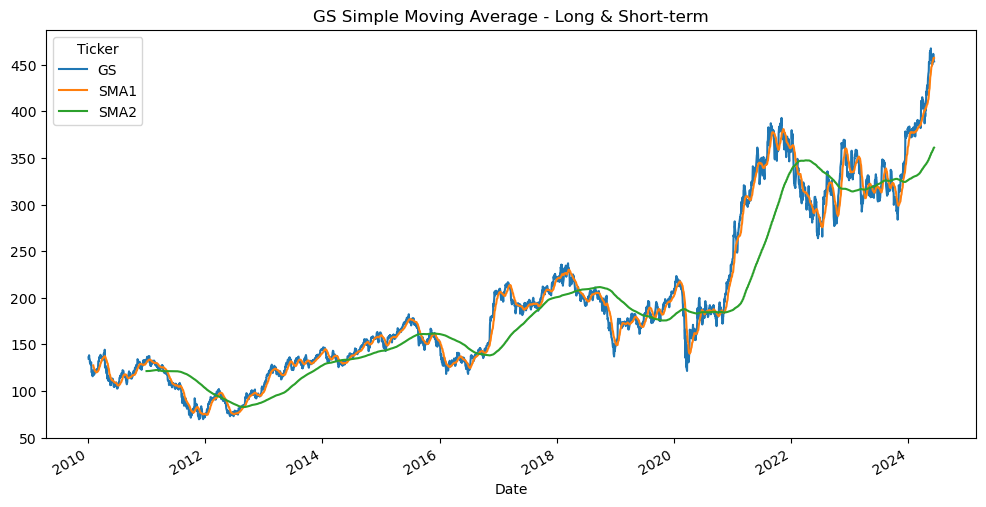

In [56]:
amzn_df[['GS', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("GS Simple Moving Average - Long & Short-term")
plt.show()

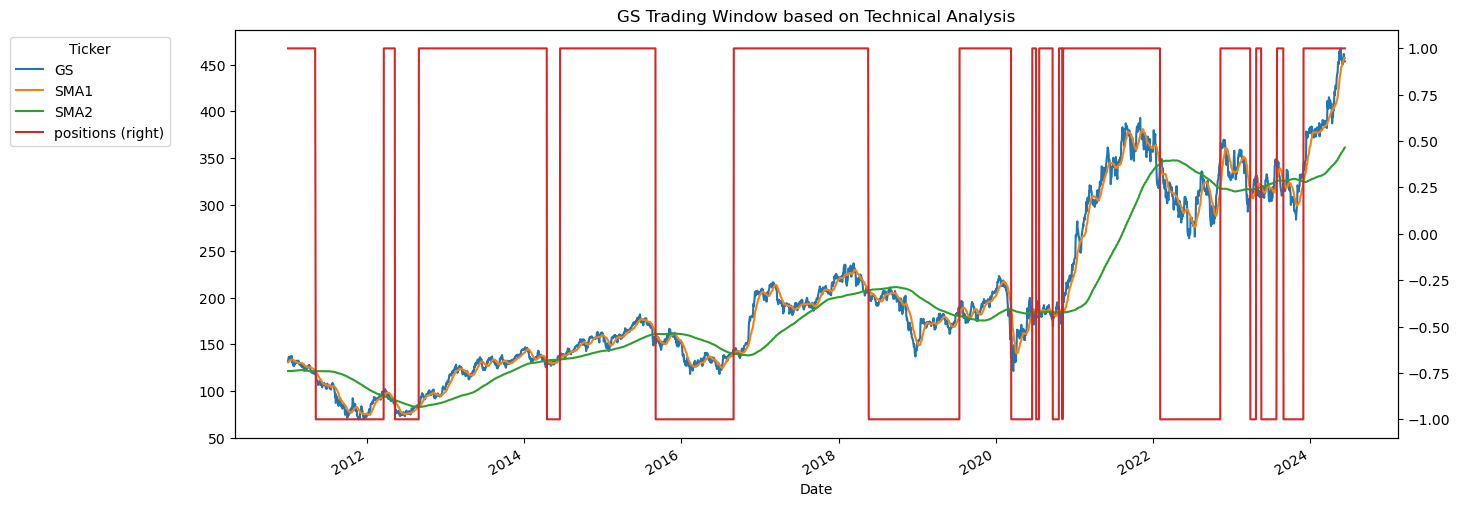

In [57]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스
amzn_df.dropna(inplace=True)

amzn_df['positions'] = np.where(amzn_df['SMA1'] > amzn_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = amzn_df[['GS', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("GS Trading Window based on Technical Analysis")
plt.show()

---

In [1]:
import pandas as pd

f_df = pd.read_csv('./datasets/financial_market.csv', index_col='Date', parse_dates=True)
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [2]:
# pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   ----- ---------------------------------- 81.9/614.7 kB 1.5 MB/s eta 0:00:01
   --------- ------------------------------ 143.4/614.7 kB 1.4 MB/s eta 0:00:01
   ------------ --------------------------- 194.6/614.7 kB 1.2 MB/s eta 0:00:01
   ----------------- ---------------------- 266.2/614.7 kB 1.4 MB/s eta 0:00:01
   ---------------------- ----------------- 348.2/614.7 kB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 378.9/614.7 kB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 460.8/614.7 kB 1.4 MB/s eta 0:00:01
   ------------------------------- -------- 491.5/614.7 kB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 573.4/614.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 1

In [28]:
import pmdarima as pm

pre_f_df = f_df.dropna()
pre_f_df

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
2010-01-08,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58


In [29]:
amzn_df = pre_f_df[['AAPL.O']].iloc[-252:]
amzn_df

,AAPL.O
Date,
2017-06-30,144.02
2017-07-03,143.50
2017-07-05,144.09
2017-07-06,142.73
2017-07-07,144.18
...,...
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16


In [30]:
y_train = amzn_df['AAPL.O'][:int(0.8*len(amzn_df))]
y_test = amzn_df['AAPL.O'][int(0.8*len(amzn_df)):]

<Axes: xlabel='Date'>

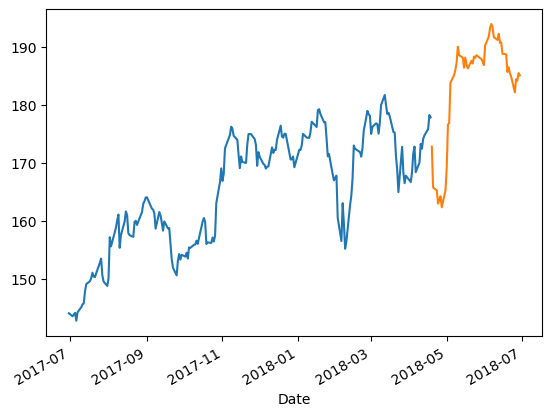

In [31]:
y_train.plot()
y_test.plot()

In [32]:
from pmdarima.arima import ndiffs
# KPSS ()
# 차분을 진행하는 것이 필요한 지 결정하는 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다"로 설정한 뒤
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다.
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs,adf_diffs,pp_diffs)
print(f'd={n_diffs}')



d=1


In [33]:
import pmdarima as pm

model = pm.auto_arima(y=y_train, d=1, start_p=0, max_p=3, start_q=0, max_q=3, m=1, seasonal=False, stepwise=True, trace=True )



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=887.243, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=888.809, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=888.672, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=886.419, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=887.764, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.189 seconds


In [34]:
model.fit(y_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [35]:
# prob(Q) 융-박스 검정 통계량
# 영가설 : 잔차가 백색잡음 시계열을 따른다.
# 0.05 이상 : 서로 독립이고 동일한 분포를 따른다.

# prob(H) : 이분산성 검정 통계량
# 영가설 : 잔차가 이분산성을 따르지 않는다.
# 0.05이상 : 잔차의 분산이 일정하다.

# prob(JB) : 자크-배라 검정 통꼐량
# 영가설 : 잔차가 정규성을 따른다.
# 0.05 이상 : 일정한 평균과 분산을 따른다.

# skew(쏠린정도, 왜도)
# 0에 가까워야 한다.

# kurtosis(첨도, 뾰적한 정도)
# 3에 가까워야 한다.

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -442.210
Date:                Wed, 12 Jun 2024   AIC                            886.419
Time:                        10:48:59   BIC                            889.717
Sample:                             0   HQIC                           887.754
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.8755      0.366     13.322      0.000       4.158       5.593
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                20.09
Prob(Q):                              0.51   Pr

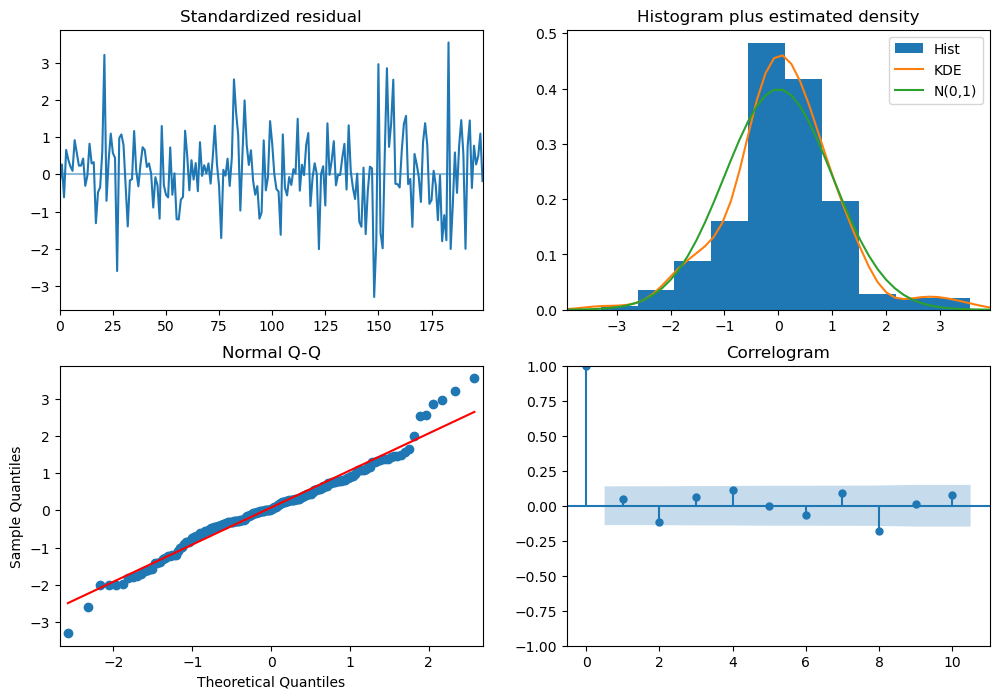

In [36]:


model.plot_diagnostics(figsize=(12,8))
plt.show()

In [37]:
prediction, conf_int = model.predict(n_periods=len(y_test), return_conf_int=True)
prediction

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


201    177.84
202    177.84
203    177.84
204    177.84
205    177.84
206    177.84
207    177.84
208    177.84
209    177.84
210    177.84
211    177.84
212    177.84
213    177.84
214    177.84
215    177.84
216    177.84
217    177.84
218    177.84
219    177.84
220    177.84
221    177.84
222    177.84
223    177.84
224    177.84
225    177.84
226    177.84
227    177.84
228    177.84
229    177.84
230    177.84
231    177.84
232    177.84
233    177.84
234    177.84
235    177.84
236    177.84
237    177.84
238    177.84
239    177.84
240    177.84
241    177.84
242    177.84
243    177.84
244    177.84
245    177.84
246    177.84
247    177.84
248    177.84
249    177.84
250    177.84
251    177.84
dtype: float64

In [38]:
prediction.t

AttributeError: 'Series' object has no attribute 't'

In [ ]:
def predict_one_step():
    prediction, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return(prediction.tolist()[0], conf_int.tolist()[0])
 

In [39]:
preds = []
p_list = []

conf_int_lower = []
conf_int_upper = []

for data in y_test:
    p, c = predict_one_step()
    p_list.append(p)
    conf_int_lower.append(c[0])
    conf_int_upper.append(c[1])

    model.update(data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [40]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
Date,,
2018-04-19,172.80,177.84
2018-04-20,165.72,172.80
2018-04-23,165.24,165.72
2018-04-24,162.94,165.24
2018-04-25,163.65,162.94
2018-04-26,164.22,163.65
2018-04-27,162.32,164.22
2018-04-30,165.26,162.32
2018-05-01,169.10,165.26


In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplot(1,1, figsize=(12,6))

plt.plot(y_train, label='train')
plt.plot(y_test, label='train')
plt.plot(y_predict_df.pred, label='train')
plt.show()

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In [42]:
import numpy as np

def MAPE(y_tset, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAPE (%) : {MAPE(y_test, p_list)}')

MAPE (%) : 0.9309990142928763
